##### Imports

In [ ]:
import numpy as np
from random import seed
from numpy import random
import matplotlib.pyplot as plt
import math
import scipy.stats as st

## Problem 1


#### 1.c
Creating the function sim_markov to simulate the markov chain.

In [ ]:
b = 0.01 #beta
g = 0.1 #gamma
a = 0.005 #alpha

P = np.matrix(f'{1 - b} {b} 0; 0 {1 - g} {g}; {a} 0 {1-a}') #creating matrix P

def sim_markov(P, init_state, days):
    cur_state = init_state.index(1) #0 - 2, integer
    result = [cur_state]
    
    day = 0
    while day < days:
        p = np.array(P[cur_state])[0] #returns a 1*3 array with probability elements
        next_state = np.random.choice([0, 1, 2], p=p) #chooses a state based on prob

        cur_state = next_state #update
        day += 1
        result.append(cur_state) 
    
    S = result.count(0)
    I = result.count(1)
    R = result.count(2)
    days_in_states = [S, I, R] 
    return result, days_in_states

Checking if the matrix is regular:

In [ ]:
P**1000

matrix([[0.32258075, 0.03225808, 0.64516118],
        [0.32258059, 0.03225806, 0.64516135],
        [0.3225806 , 0.03225806, 0.64516134]])

Visualisation of a single simulation:

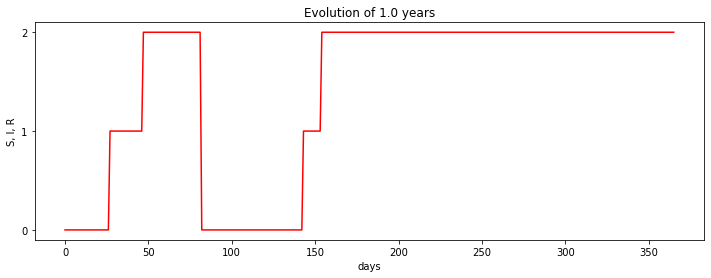

In [ ]:
days = 365 * 1
init_state = [1, 0, 0]

t = np.arange(0, days+1, 1)
res, dayStates = sim_markov(P, init_state, days)

plt.figure(figsize=(12, 4))
plt.yticks([0, 1, 2])
plt.plot(t, res, color = 'red')
plt.ylabel("S, I, R")
plt.xlabel("days")
plt.title(f"Evolution of {days / 365} years")
plt.savefig("evolutionOf7300.pdf")


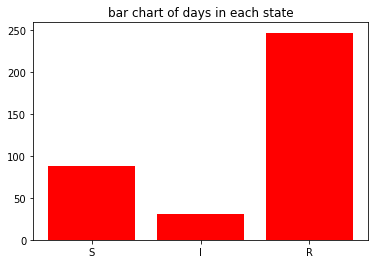

In [ ]:
st = ['S', 'I', 'R']
plt.title("bar chart of days in each state")
plt.bar(st, dayStates, color = 'red')
plt.savefig("barchart.pdf")

simulating 30 markov chains and storing the limiting distrubution found in each simulation in the container pi_list.

In [ ]:
days = 365*20
pi_list = []
for i in range(30):
    res = sim_markov(P, init_state, days)[0]
    res = res[365*10 :]
    pi = [res.count(0) / len(res), res.count(1) / len(res), res.count(2) / len(res)]
    pi_list.append(pi)

We need to calculate CI based on a unknown distrubution. Meaning we have to use the empirical varianse:

$S^2 = \frac{ \sum (X - \overline{X})^2}{N - 1}$ empirical variance

The equation for confidensial intervall for our data is:

$$\overline{X} - t_{df, \alpha} \frac{S}{\sqrt{n}} < \mu < \overline{X} + t_{df, \alpha} \frac{S}{\sqrt{n}} $$

where $\mu$ is the expected value. \
The degrees of freedom in our data is equal to $n - 1 = 29$. The t-value can be read from tables and is found to be:
$t_{29, 0.025} = 2.04522964$. Which is based on a two tailed distrubution

calculating averages and variance:


In [ ]:
piS = [l[0] for l in pi_list] 
piI = [l[1] for l in pi_list]
piR = [l[2] for l in pi_list]

avg_pi = [np.sum(piS) / len(piS), np.sum(piI) / len(piI), np.sum(piR) / len(piR)]

sS_squared = sum((p - avg_pi[0])**2 for p in piS) / (len(piS) - 1) #s^2 for state S
sI_squared = sum((p - avg_pi[1])**2 for p in piI) / (len(piI) - 1) #s^2 for state I
sR_squared = sum((p - avg_pi[2])**2 for p in piR) / (len(piR) - 1) #s^2 for state R

t = 2.04522964 #from table, df = 29, signifikans = 0.025. Two tailed.

CI_S = [avg_pi[0] - t * (np.sqrt(sS_squared) / np.sqrt(len(piS))), avg_pi[0] + t * (np.sqrt(sS_squared) / np.sqrt(len(piS)))]
CI_I = [avg_pi[1] - t * (np.sqrt(sI_squared) / np.sqrt(len(piI))), avg_pi[1] + t * (np.sqrt(sI_squared) / np.sqrt(len(piI)))]
CI_R = [avg_pi[2] - t * (np.sqrt(sR_squared) / np.sqrt(len(piR))), avg_pi[2] + t * (np.sqrt(sR_squared) / np.sqrt(len(piR)))]

print(f"95% confidence intervals: \n pi_0: ", CI_S, "\n pi_1:", CI_I, "\n pi_2: ", CI_R)



95% confidence intervals: 
 pi_0:  [0.2646151365570072, 0.31241398788378527] 
 pi_1: [0.02894753139857071, 0.03474278175764219] 
 pi_2:  [0.6561851351766484, 0.703095427226346]


##### 1.e

initiating alpha, beta and gamma. And creating the matrix P with variable b

In [ ]:
N = 1000

g = 0.1 #gamma
a = 0.005
b = lambda In: (0.5 * In) / N #beta variable

P = lambda I: [[1 - b(I), b(I), 0], [0, 1 - g, g], [a, 0, 1 - a]]


Creating the simulation function, which uses a binomial distrubution.

In [ ]:
def simBinom(vaccinated = 0):
    numS = 950 - vaccinated
    numI = 50
    numR = 0

    S = []
    I = []
    R = []

    data = [[numS, numI, numR]]

    for i in range(300):

        pSR = P(numI)[2][0]
        pRI = P(numI)[1][2]
        pIS = P(numI)[0][1]

        newI = np.random.binomial(numS, pIS, 1) #becoming infected given susceptible
        newR = np.random.binomial(numI, pRI, 1)
        newS = np.random.binomial(numR, pSR, 1)

        numS -= newI
        numI -= newR
        numR -= newS

        numS += newS
        numI += newI
        numR += newR

        S.append(numS[0])
        I.append(numI[0])
        R.append(numR[0])

    return S, I, R

Function that simulates with casualties. Not asked for in the problem.

In [ ]:
def simBinomWithCasualties(vaccinated = 0):
    numS = 950 - vaccinated
    numI = 50
    numR = 0
    numD = 0

    S = []
    I = []
    R = []
    D = []

    pDI = 0.01 #very deadly disease

    data = [[numS, numI, numR]]

    for i in range(300):

        pSR = P(numI)[2][0]
        pRI = P(numI)[1][2]
        pIS = P(numI)[0][1]

        newI = np.random.binomial(numS, pIS, 1) #becoming infected given susceptible
        newR = np.random.binomial(numI, pRI, 1)
        newS = np.random.binomial(numR, pSR, 1)
        newD = np.random.binomial(numI, pDI, 1)

        numD += newD

        numS -= newI
        numI -= (newR + newD)
        numR -= newS

        numS += newS
        numI += newI
        numR += newR

        S.append(numS[0])
        I.append(numI[0])
        R.append(numR[0])
        D.append(numD[0])

    return S, I, R, D

Visualising result:

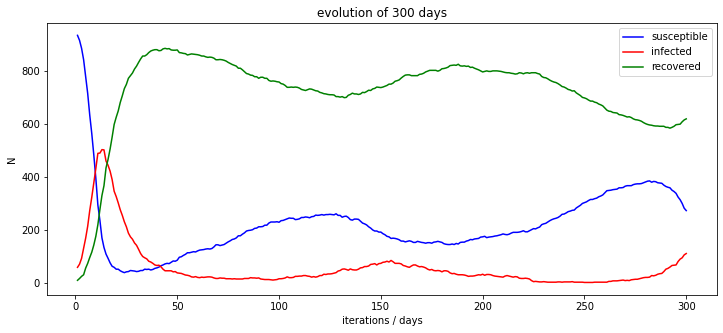

In [ ]:
S, I, R = simBinom()
time = np.arange(1, 301, 1)
plt.figure(figsize = (12, 5))
plt.plot(time, S, color = "blue", label = "susceptible")
plt.plot(time, I, color = "red", label = "infected")
plt.plot(time, R, color = "green", label = "recovered")
plt.ylabel("N")
plt.xlabel("iterations / days")
plt.title(f"evolution of {300} days")
plt.legend()
plt.savefig("EvOf300.pdf")
plt.show()

Visualising with casualties:

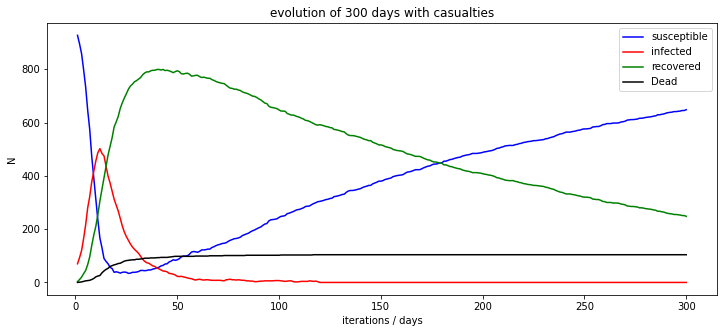

In [ ]:
S, I, R, D = simBinomWithCasualties()
time = np.arange(1, 301, 1)
plt.figure(figsize = (12, 5))
plt.plot(time, S, color = "blue", label = "susceptible")
plt.plot(time, I, color = "red", label = "infected")
plt.plot(time, R, color = "green", label = "recovered")
plt.plot(time, D, color = "black", label = "Dead")
plt.ylabel("N")
plt.xlabel("iterations / days")
plt.title(f"evolution of {300} days with casualties")
plt.legend()
plt.savefig("EvOf300withCas.pdf")
plt.show()

#### 1.f

Function for confidence intervall with vaccinated people

In [ ]:
def CI(vaccinated = 0, extra = False): #calculates the confidensial intervall given vaccinated people.
    
    t_value = 1.96234147 #two tailed
    
    maximumIs = []
    corrTimes = []

    for i in range(1000):
        S, I, R = simBinom(vaccinated=vaccinated)
        maxI = max(I)
        corrT = I.index(max(I))

        maximumIs.append(maxI)
        corrTimes.append(corrT)

    avgMaxI = (sum(maximumIs) / len(maximumIs))
    avgTime = (sum(corrTimes) / len(corrTimes))

    S_Isquared = sum((m - avgMaxI)**2 for m in maximumIs) / (len(maximumIs) - 1) #emperical vaiance
    S_Tsquared = sum((t - avgTime)**2 for t in corrTimes) / (len(corrTimes) - 1)

    CI_I = [avgMaxI - t_value * (np.sqrt(S_Isquared) / np.sqrt(len(maximumIs))), avgMaxI + t_value * (np.sqrt(S_Isquared) / np.sqrt(len(maximumIs)))]
    CI_T = [avgTime - t_value * (np.sqrt(S_Tsquared) / np.sqrt(len(corrTimes))), avgTime + t_value * (np.sqrt(S_Tsquared) / np.sqrt(len(corrTimes)))]
    
    print("95% confidence intervals: \n S: ", CI_I, "\n I: ", CI_T)
    
    if extra:
        return maximumIs, corrTimes, CI_I, CI_T
    


1000 - 1 degrees of freedom $\implies$ t = 1.96234147 "two tailed".

In [ ]:
maximumIs, corrTimes, CI_I, CI_T = CI(True)

95% confidence intervals: 
 S:  [521.8430138747692, 524.3489861252308] 
 I:  [10.828214744753959, 10.933785255246042]


TypeError: cannot unpack non-iterable NoneType object

#### Visualising data from simulations with confidence intervall

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(np.arange(0, len(maximumIs), 1), maximumIs, label="maximum infected people", alpha = 0.5)

y1 = [CI_I[0] for i in range(len(maximumIs))]
y2 = [CI_I[1] for i in range(len(maximumIs))]
plt.fill_between(np.arange(0, len(maximumIs), 1), y1, y2, color = "red", label = "95% confidence intervall")

plt.title("maximum infected people vs iteration, 0 people vaccinated")
plt.xlabel("iteration")
plt.ylabel("infected people")

plt.legend()
plt.savefig("CI.pdf")
plt.show()

NameError: name 'maximumIs' is not defined

<Figure size 864x360 with 0 Axes>

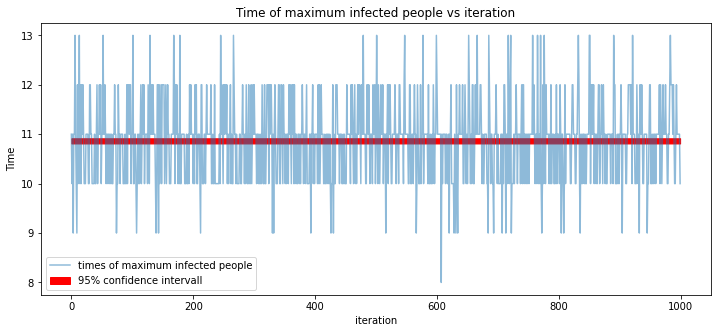

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(np.arange(0, len(corrTimes), 1), corrTimes, label="times of maximum infected people", alpha = 0.5)

y1 = [CI_T[0] for i in range(len(corrTimes))]
y2 = [CI_T[1] for i in range(len(corrTimes))]
plt.fill_between(np.arange(0, len(corrTimes), 1), y1, y2, color = "red", label = "95% confidence intervall")

plt.title("Time of maximum infected people vs iteration")
plt.xlabel("iteration")
plt.ylabel("Time")

plt.legend()
plt.savefig("CI_T.pdf")
plt.show()

#### Simulating with vaccinated people

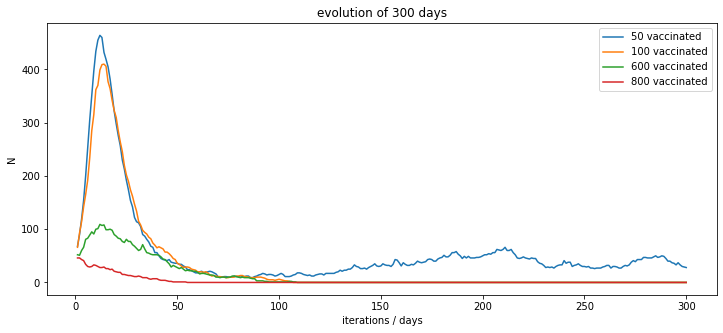

In [ ]:
I1 = simBinom(vaccinated=50)[1]
I2 = simBinom(vaccinated=100)[1]
I3 = simBinom(vaccinated=600)[1]
I4 = simBinom(vaccinated=800)[1]


time = np.arange(1, 301, 1)

plt.figure(figsize = (12, 5))
plt.plot(time, I1, label = "50 vaccinated")
plt.plot(time, I2, label = "100 vaccinated")
plt.plot(time, I3, label = "600 vaccinated")
plt.plot(time, I4, label = "800 vaccinated")

plt.ylabel("N")
plt.xlabel("iterations / days")
plt.title(f"evolution of {300} days")
plt.legend()
plt.savefig("vaccines.pdf")
plt.show()


#### Confidence intervall of expected values with infected people:

In [ ]:
CI(vaccinated = 50)
CI(vaccinated=100)
CI(vaccinated = 600)
CI(vaccinated = 800)

95% confidence intervals: 
 S:  [479.5590040110139, 482.1569959889861] 
 I:  [11.165784330385549, 11.280215669614453]
95% confidence intervals: 
 S:  [438.3437193450116, 440.84228065498843] 
 I:  [11.598525714600596, 11.721474285399404]
95% confidence intervals: 
 S:  [96.77527605036647, 98.45872394963354] 
 I:  [14.425359315971342, 14.964640684028659]
95% confidence intervals: 
 S:  [49.650067419918436, 50.10193258008156] 
 I:  [0.8209369155192805, 1.0290630844807196]


In [ ]:
#Problem 2
def sum_days(lam,t): #a function that sums up the number of claims 
    return sum(np.random.poisson(lam,t))



iterations = [sum_days(1.5,59) for _ in range(1000)] #Summing the days 1000 times
                                                     #To compare with calcualted probability

# Given these 1000 processes we calculate the the percentile of scores over 100 
P = 100-st.percentileofscore(iterations,100)
print(P)

10.0


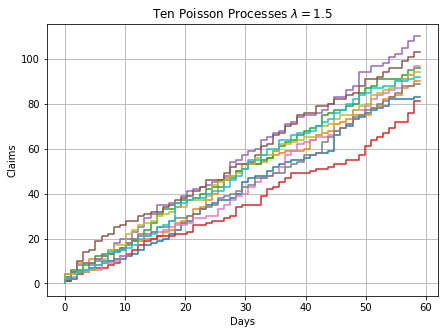

In [ ]:
# data
N = 59 # step
lambdas = [1.5, 1.5, 1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5] #list of the same lambdas with size ten
X_t = [np.random.poisson(lam, size=N) for lam in lambdas]# creating a random poisson for each of the lambdas
S = [[np.sum(X[0:i]) for i in range(N)] for X in X_t]# summing them all up, and iterating over each timestep
X = np.linspace(0, N, N)

#Plotting the different Poisson processes as discrete steps
plt.figure(figsize=(7,5))
[plt.step(X, S[i])[0] for i in range(len(lambdas))]

plt.title("Ten Poisson Processes $\lambda = 1.5$")
plt.xlabel("Days") 
plt.ylabel("Claims") 
plt.grid()
plt.savefig("blablabla.pdf") 
plt.show()



In [ ]:

p = lambda t: np.random.poisson(1.5, t)

s = 0
for i in range(1000): #iterating
    count = sum(p(59)) #finding number of claims
    if count > 100:
        s += 1

print("percentage of more than 100 claims: ")
print(round((s/1000) * 100, 3), "%") #lignende det du får Thomas

percentage of more than 100 claims: 
10.9 %


#### Precentage of claims higher than 8m $

In [ ]:
f = lambda c: np.random.exponential(1/10, c)

zs = []
for _ in range(1000): #iterating
    count = sum(p(59)) #finding number of claims 
    z = sum(f(count)) #summing over the claim values, determined by the exponential distrubution
    zs.append(z) #adding in zs list

s = 0
for z in zs: #counting each z over 8
    if(z > 8):
        s += 1

print("percentage of claims higher than 8 million:")
print(round((s/1000) * 100, 3), "%")




percentage of claims higher than 8 million:
72.6 %


#### Visualising 10 realisations of Z(t)

In [ ]:
zs = []
for _ in range(10):
    count = sum(p(59))
    z = sum(f(count))
    zs.append(z)

t = np.arange(0, len(zs), 1)

eight = [8 for _ in t]
plt.figure(figsize = (7, 5))
plt.title("10 realisations of Z(t), t = [0, 59]")
plt.plot(t, eight, "--", color="grey")
plt.plot(t, zs, label="Z(t)", s=80, color = "green")
plt.xlabel("realisations")
plt.ylabel("million NOK")
plt.ylim([0, 14])

plt.legend()
plt.show()

NameError: name 'p' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cef29ee6-fb54-47f7-beb8-4c82e6d36160' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>